# Summary(udate 10.06)
In this notebook, I discuss two main points. 
First, there can be cases where the monopoly price is $\hat{\rho}$. 
Second, when the monopoly price is $\hat{\rho}$, the firm's profit per trade may be non-strictly increasing.

This suggests that when proving FOSD and SME Existence in the future, it may be mathematically challenging if the monopoly price is $\hat{\rho}$.

Therefore, I believe it is better to exclude cases where the monopoly price is $\hat{\rho}$ by imposing strong mathematical assumptions and restrictions.

# 1. Counter-example

I have identified a counterexample to Tim's recently proposed lemma and corollary. 

This finding implies that the underlying assumptions of Tim's lemma may not hold under certain conditions, necessitating further scrutiny and potential revision of the lemma. For instance, if $\tilde{z}$<$z$<$\hat{z}$, then $\rho_m$ becomes $\hat{\rho}$.

$\tilde{z}$ satisfies $\tilde{\rho}(\tilde{z},i)$ =$\frac{c}{1 - \sigma_{DM}}$ \
$\hat{z}$ satisfies $\hat{\rho}(\hat{z})$ =$\frac{c}{1 - \sigma_{DM}}$

This implies that $\rho_m$ can be $\hat{\rho}$ instead of $\frac{c}{1-\sigma}$.

\begin{align*}
    \hat{z} &= \left( \frac{c}{1 - \sigma_{DM}} \right)^{\frac{\sigma_{DM} - 1}{\sigma_{DM}}} \\
    \tilde{z} &= (1 + i)^{-\frac{1}{\sigma_{DM}}} \left( \frac{c}{1 - \sigma_{DM}} \right)^{\frac{\sigma_{DM} - 1}{\sigma_{DM}}}
\end{align*}

Furthermore, the parameter I used, $\sigma_{DM}$, is less than 0.4225. Therefore, it also satisfies Tim's parameter restriction.

In [3]:
import bcw_bj_Lemma_1 as bcw_bj
import numpy as np
import scipy as sp
from textwrap import dedent
from scipy.optimize import brentq, fsolve
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import sys
import time
import collections as collections
from cycler import cycler

In [32]:
model=bcw_bj.baseline_mod()

i=0.05

z_hat = (model.c/(1-model.σ_DM))**((model.σ_DM-1)/model.σ_DM)

z_til = (1+i)**(-1/model.σ_DM)*(model.c/(1-model.σ_DM))**((model.σ_DM-1)/model.σ_DM)

In [ ]:
print(model.σ_DM)

In [4]:
print(z_hat)
print(z_til)

0.47214350515412556
0.4206509099573759


The value of $z$ is greater than $\tilde{z}$ but less than $\hat{z}$.

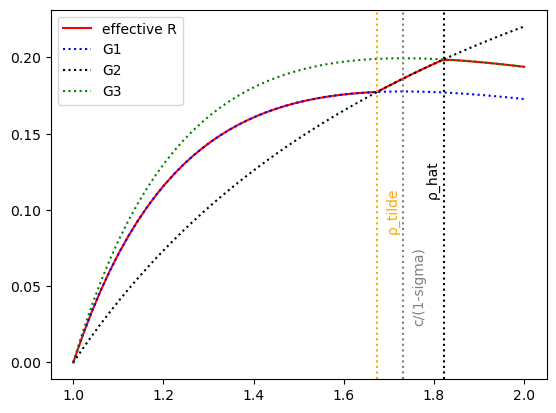

In [5]:
z=z_til+0.02

ρ_hat=model.ρ_hat_func(z)

ρ_tilde=model.ρ_tilde_func(z,i)

ρ_max_0 = model.c/(1-model.σ_DM)

ρ_range = np.linspace(model.c,2,50)

plt.plot(ρ_range,[model.R_func(ρ, i, z) for ρ in ρ_range],label="effective R",color="r") 
plt.plot(ρ_range,[model.G1(ρ, i, z) for ρ in ρ_range],label="G1",color="b",linestyle=":") 
plt.plot(ρ_range,[model.G2(ρ, i, z) for ρ in ρ_range],label="G2",color="black",linestyle=":") 
plt.plot(ρ_range,[model.G3(ρ, i, z) for ρ in ρ_range],label="G3",color="green",linestyle=":") 

# Add vertical lines for ρ_hat, ρ_tilde, and ρ_max_0, with labels
plt.axvline(ρ_hat, color='black', linestyle=':')  # Vertical line at ρ_hat
plt.text(ρ_hat-0.04, 0.12, 'ρ_hat', rotation=90, color='black', verticalalignment='center')  # Label for ρ_hat

plt.axvline(ρ_tilde, color="orange", linestyle=':')  # Vertical line at ρ_tilde
plt.text(ρ_tilde+0.02, 0.1, 'ρ_tilde', rotation=90, color='orange', verticalalignment='center')  # Label for ρ_tilde

plt.axvline(ρ_max_0, color='grey', linestyle=':')  # Vertical line at ρ_max_0
plt.text(ρ_max_0+0.02, 0.05, 'c/(1-sigma)', rotation=90, color='grey', verticalalignment='center')  # Label for ρ_max_0

# Add a legend to the plot
plt.legend()
# Display the plot
plt.show()

This implies that $\rho_m$ can be $\hat{\rho}$ instead of $\frac{c}{1-\sigma}$.

# 2. Non-strictly increasing case

I believe that when $\hat{\rho}$ is the monopoly price, the effective firm's revenue may not be strictly increasing. This also leads to mathematical issues when deriving the real price distribution.

This occurs when $z$ is smaller than $\tilde{z}$. See the figure below. The following happens when $\frac{c}{1 - \sigma_{DM}}$ is smaller than both $\tilde{\rho}$ and $\hat{\rho}$. From the figure, it is evident that the firm's monopoly price should be $\hat{\rho}$. However, the firm's profit per trade increases up to $\frac{c}{1 - \sigma_{DM}}$, but then decreases before increasing again. I believe that in cases where the monopoly price is $\hat{\rho}$, the firm's revenue is not strictly increasing, which can lead to problems.

0.3306509099573759


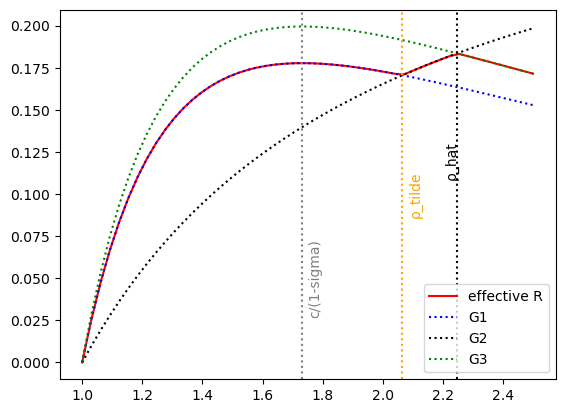

In [25]:
z=z_til-0.09

print(z)

ρ_hat=model.ρ_hat_func(z)

ρ_tilde=model.ρ_tilde_func(z,i)

ρ_max_0 = model.c/(1-model.σ_DM)

ρ_range = np.linspace(model.c,2.5,50)

plt.plot(ρ_range,[model.R_func(ρ, i, z) for ρ in ρ_range],label="effective R",color="r") 
plt.plot(ρ_range,[model.G1(ρ, i, z) for ρ in ρ_range],label="G1",color="b",linestyle=":") 
plt.plot(ρ_range,[model.G2(ρ, i, z) for ρ in ρ_range],label="G2",color="black",linestyle=":") 
plt.plot(ρ_range,[model.G3(ρ, i, z) for ρ in ρ_range],label="G3",color="green",linestyle=":") 

# Add vertical lines for ρ_hat, ρ_tilde, and ρ_max_0, with labels
plt.axvline(ρ_hat, color='black', linestyle=':')  # Vertical line at ρ_hat
plt.text(ρ_hat-0.04, 0.12, 'ρ_hat', rotation=90, color='black', verticalalignment='center')  # Label for ρ_hat

plt.axvline(ρ_tilde, color="orange", linestyle=':')  # Vertical line at ρ_tilde
plt.text(ρ_tilde+0.02, 0.1, 'ρ_tilde', rotation=90, color='orange', verticalalignment='center')  # Label for ρ_tilde

plt.axvline(ρ_max_0, color='grey', linestyle=':')  # Vertical line at ρ_max_0
plt.text(ρ_max_0+0.02, 0.05, 'c/(1-sigma)', rotation=90, color='grey', verticalalignment='center')  # Label for ρ_max_0

# Add a legend to the plot
plt.legend()
# Display the plot
plt.show()

Looking more closely, one can clearly see that the revenue is indeed non-increasing.

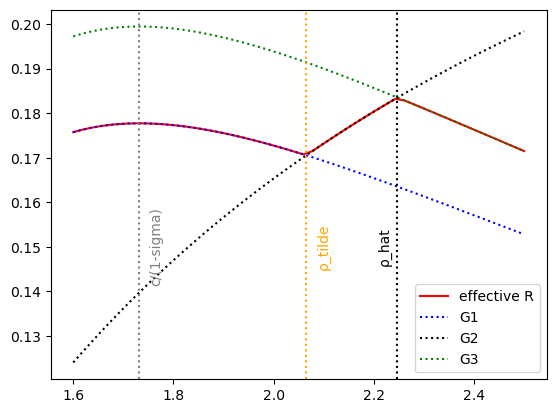

In [28]:

ρ_range = np.linspace(1.6,2.5,50)

plt.plot(ρ_range,[model.R_func(ρ, i, z) for ρ in ρ_range],label="effective R",color="r") 
plt.plot(ρ_range,[model.G1(ρ, i, z) for ρ in ρ_range],label="G1",color="b",linestyle=":") 
plt.plot(ρ_range,[model.G2(ρ, i, z) for ρ in ρ_range],label="G2",color="black",linestyle=":") 
plt.plot(ρ_range,[model.G3(ρ, i, z) for ρ in ρ_range],label="G3",color="green",linestyle=":") 

# Add vertical lines for ρ_hat, ρ_tilde, and ρ_max_0, with labels
plt.axvline(ρ_hat, color='black', linestyle=':')  # Vertical line at ρ_hat
plt.text(ρ_hat-0.04, 0.15, 'ρ_hat', rotation=90, color='black', verticalalignment='center')  # Label for ρ_hat

plt.axvline(ρ_tilde, color="orange", linestyle=':')  # Vertical line at ρ_tilde
plt.text(ρ_tilde+0.02, 0.15, 'ρ_tilde', rotation=90, color='orange', verticalalignment='center')  # Label for ρ_tilde

plt.axvline(ρ_max_0, color='grey', linestyle=':')  # Vertical line at ρ_max_0
plt.text(ρ_max_0+0.02, 0.15, 'c/(1-sigma)', rotation=90, color='grey', verticalalignment='center')  # Label for ρ_max_0

# Add a legend to the plot
plt.legend()
# Display the plot
plt.show()